# opencv course
# A presentation by Mohammad Kahkeshani
### instagram:
#### codevision_academy
#### kahkeshani_mohammad

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'binary')

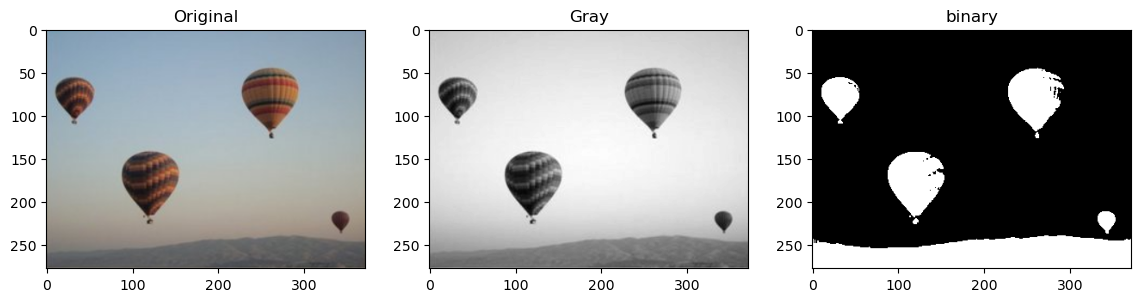

In [2]:
img = cv2.imread('images/balloon.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title('Original')
plt.subplot(132);plt.imshow(gray, cmap='gray');plt.title('Gray')
plt.subplot(133);plt.imshow(binary, cmap='gray');plt.title('binary')

### morphology and contours

Text(0.5, 1.0, 'Contours')

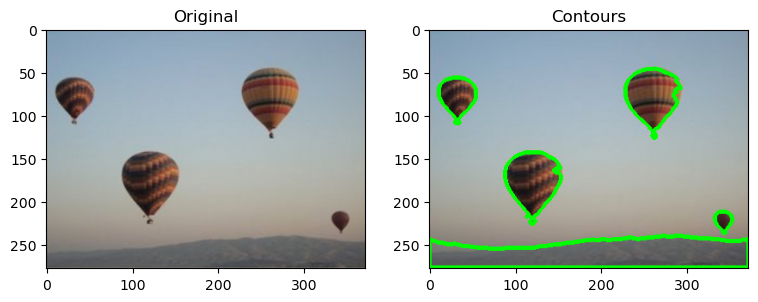

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5),(2,2))
close = cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel)

contours,_ = cv2.findContours(close, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
draw = cv2.drawContours(img.copy(),contours,-1,(0,255,0),3)

plt.figure(figsize=[14,8])
plt.subplot(131);plt.imshow(img[...,::-1]);plt.title('Original')
plt.subplot(132);plt.imshow(draw[...,::-1]);plt.title('Contours')

### draw each countors

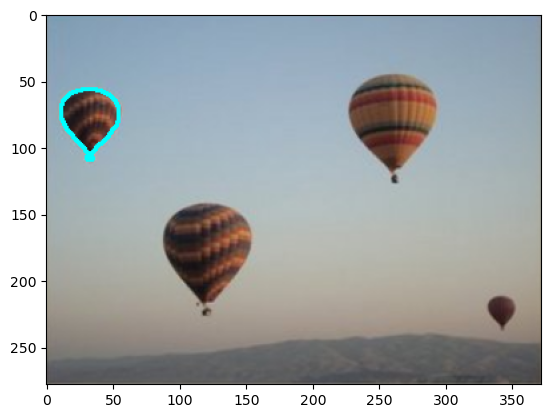

In [4]:
draw = img.copy()
cv2.drawContours(draw,[contours[3]],-1,(255,255,0),2)
plt.imshow(draw[...,::-1])

### bounding rectangle

In [5]:
boundRect = cv2.boundingRect(contours[3])
boundRect

(11, 56, 44, 54)

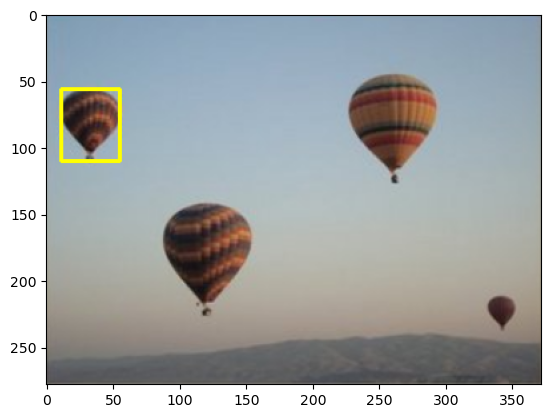

In [6]:
draw = img.copy()

cv2.rectangle(draw, (int(boundRect[0]), int(boundRect[1])), \
  (int(boundRect[0]+boundRect[2]), int(boundRect[1]+boundRect[3])), (0,255,255), 2)
plt.imshow(draw[...,::-1])

### Bounding all contours

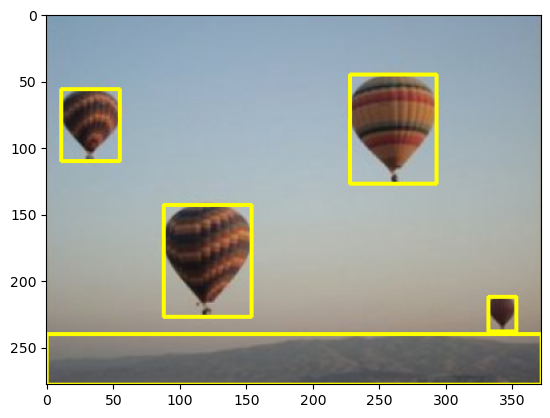

In [7]:
img = cv2.imread("images/balloon.png")            

# convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)         

# invert black and white
_, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

drawing = img.copy()

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(drawing, (x, y), (x + w, y + h), (0, 255, 255), 2)

plt.imshow(drawing[...,::-1])